In [1]:
import os
import glob
import contextily as ctx
import geopandas as gpd
from asp_plot.icesat2 import ICESat2

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]

geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

atl06_fn = "/Users/ben/Dropbox/UW_Shean/ICESat/icesat2_atl06_sr_10mRes_utqiagvik_WorldCover_water_crop_MayJune_allTime.parquet"
atl06 = gpd.read_parquet(atl06_fn)


icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
icesat2 = ICESat2(dem_fn=dem_fn, geojson_fn=geojson_fn, atl06=atl06)

In [4]:
if icesat2.atl06 is None:
    icesat2.pull_atl06_data()

icesat2.atl06.head()

,spot,rms_misfit,n_fit_photons,cycle,gt,region,h_mean,rgt,segment_id,dh_fit_dx,y_atc,h_sigma,x_atc,pflags,w_surface_window_final,geometry,esa-worldcover-.flags,esa-worldcover-.time,esa-worldcover-.file_id,esa-worldcover-.value
time,,,,,,,,,,,,,,,,,,,,
2019-05-17 15:18:24,1,0.150303,21,3,10,3,1.928805,754,396834,0.009718,17273.412109,0.070769,7953791.0,0,3.0,POINT (-156.51968 71.27569),0,1.309046e+12,98784247808,90.0
2019-05-17 15:18:24,1,0.164842,42,3,10,3,1.985397,754,396834,0.002738,17273.408203,0.025449,7953801.0,0,3.0,POINT (-156.51972 71.27577),0,1.309046e+12,98784247808,90.0
2019-05-17 15:18:24,1,0.177047,42,3,10,3,1.988446,754,396835,-0.000876,17273.402344,0.027361,7953811.0,0,3.0,POINT (-156.51976 71.27586),0,1.309046e+12,98784247808,90.0
2019-05-17 15:18:24,1,0.158754,45,3,10,3,2.001675,754,396835,0.004437,17273.390625,0.023672,7953821.0,0,3.0,POINT (-156.5198 71.27595),0,1.309046e+12,98784247808,90.0
2019-05-17 15:18:24,1,0.169095,47,3,10,3,2.024431,754,396836,0.002823,17273.373047,0.024665,7953831.0,0,3.0,POINT (-156.51983 71.27604),0,1.309046e+12,98784247808,90.0


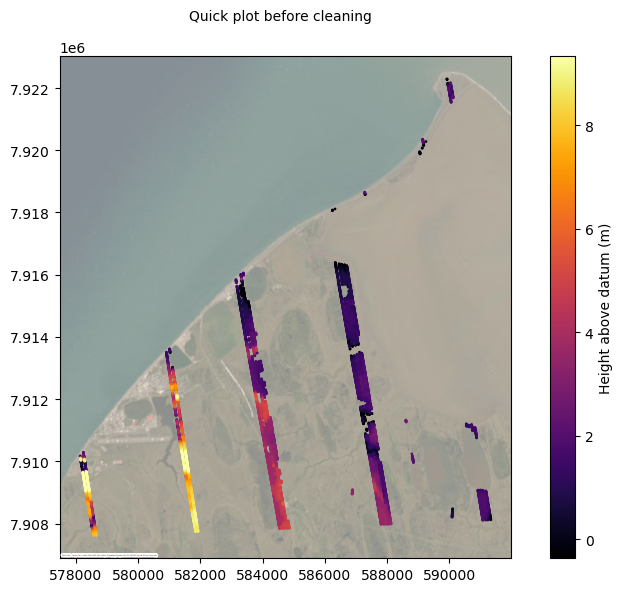

In [5]:
icesat2.title = "Quick plot before cleaning"

icesat2.plot_atl06(
    map_crs=map_crs,
    **ctx_kwargs
)